In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
from scipy import stats

try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from main.draw_tools.stacking_with_error_bars import MC_stack_plot, MC_stack_plot_density

from main.data_tools.error_bars import make_data_weight
from main.data_tools.query_dataframes import cut_dfs_7types


Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2.mplstyle, line 35 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_modern.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/belle2/jaeyoung/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an

Welcome to JupyROOT 6.24/06


In [2]:
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_cut_240228/'
# base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240306/'
base_file_loc = '/home/belle2/jaeyoung/storage_ghi/Ntuples_ghi_2/MC15ri_generic/MC15ri_etaetapip_pre_sel_240307_treefit/'


In [3]:
generic_ccbar = base_file_loc + 'ccbar/*.root'
# phigamma_ccbar = base_file_loc + 'topo/generic_ccbar.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_phi/standard.root'

generic_uubar = base_file_loc + 'uubar/*.root'
generic_ddbar = base_file_loc + 'ddbar/*.root'
generic_ssbar = base_file_loc + 'ssbar/*.root'
generic_charged = base_file_loc + 'charged/*.root'
generic_mixed = base_file_loc + 'mixed/*.root'
generic_taupair = base_file_loc + 'taupair/*.root'

In [4]:
base_filter=' Dp_M>0'
# base_filter+= ' && abs(etapip_Eta_daughterDiffOfPhi_0_1)<2.5 && etapip_Eta_daughterAngle_0_1<2 '
# base_filter+= ' && etapip_Eta_M>0.51 && etapip_Eta_M<0.57 '

In [10]:
tree = 'etapip_pipipi'
variables = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_p',\
             'etapip_pi0_gamma1_p','etapip_pi0_gamma2_p','etapip_pi0_gamma1_clusterNHits','etapip_pi0_gamma2_clusterNHits',\
             'etapip_pi0_gamma1_clusterReg', 'etapip_pi0_gamma2_clusterReg',\
             'eta_Pi0_M',"eta_Pi0_daughterAngle_0_1","eta_Pi0_daughterDiffOfPhi_0_1",\
             'eta_Pip_pionID','eta_Pim_pionID',\
             'eta_Pip_pionIDNN','eta_Pim_pionIDNN','eta_Pip_mcPDG','eta_Pim_mcPDG',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dz','Pip_p','Pip_pt']



In [11]:
pd_ccbar_0 = get_pd(file=generic_ccbar, tree=tree,base_filter=base_filter,variables=variables)
pd_uubar_0 = get_pd(file=generic_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_ddbar_0 = get_pd(file=generic_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_ssbar_0 = get_pd(file=generic_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_charged_0 = get_pd(file=generic_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_mixed_0 = get_pd(file=generic_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_taupair_0 = get_pd(file=generic_taupair, tree=tree,base_filter=base_filter,variables=variables)

input_line_86:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_97:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<unsigned int>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
input_line_104:10:7: warning: ignoring return value of function declared with 'nodiscard' attribute [-Wunused-result]
      ((const vector<double>*)obj)->empty();
      ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
pd_ccbar_1 = pd_ccbar_0.query("etapip_Eta_isSignal==1 & abs(eta_Pip_mcPDG==211) & abs(eta_Pip_mcPDG==211)")

In [ ]:
plt.hist(pd_ccbar_1.Dp_M,bins=np.linspace(1.6,2.1,51), histtype='step')
plt.xlim(1.6,2.1)

(1.0, 5.0)

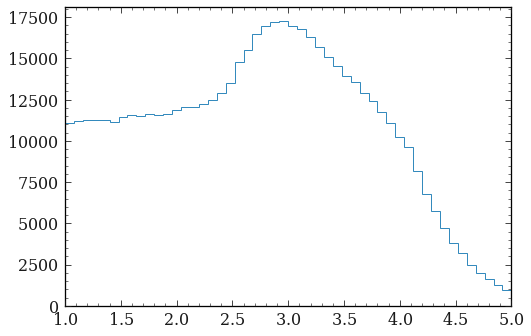

In [22]:
plt.hist(pd_ccbar_1.etapip_Eta_p,bins=np.linspace(1,5,51), histtype='step')
plt.xlim(1,5)

In [12]:
pd_ccbar = pd_ccbar_0.reset_index(drop=True)
pd_uubar = pd_uubar_0.reset_index(drop=True)
pd_ddbar = pd_ddbar_0.reset_index(drop=True)
pd_ssbar = pd_ssbar_0.reset_index(drop=True)
pd_charged = pd_charged_0.reset_index(drop=True)
pd_mixed = pd_mixed_0.reset_index(drop=True)
pd_taupair = pd_taupair_0.reset_index(drop=True)

In [13]:
# multiplicity = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) / len(pd_ccbar[["__experiment__", "__run__", "__event__"]])

numerator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_uubar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ddbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_ssbar[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_charged[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_mixed[["__experiment__", "__run__", "__event__"]].drop_duplicates()) + \
            len(pd_taupair[["__experiment__", "__run__", "__event__"]].drop_duplicates())
denominator = len(pd_ccbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_uubar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ddbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_ssbar[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_charged[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_mixed[["__experiment__", "__run__", "__event__"]]) + \
                len(pd_taupair[["__experiment__", "__run__", "__event__"]]) 


print(numerator)
print(denominator)

multiplicity = numerator/denominator

print(multiplicity)

13902075
26273698
0.5291251730152338


In [20]:
cut = 'Dp_M>0.0'
cut += '& Dp_cosAngleBetweenMomentumAndVertexVector>0.99 & eta_Pi0_daughterAngle_0_1<1.4 & abs(eta_Pi0_daughterDiffOfPhi_0_1)<1.5'

# cut = 'etapip_Eta_isSignal==1 & abs(eta_Pip_mcPDG==211) & abs(eta_Pip_mcPDG==211)'
# cut = 'rank==1'
# cut = 'Pi0_Prob2>0.52'

# cut = '__ncandidates__ ==2'
# cut = 'Belle2Pi0Veto_75MeV >0.023'
# cut = 'abs(Phi_M - 1.0195) < 0.011 & abs(Dstarp_delM-(2.0103-1.8648))<0.001 & Dstarp_CMS_p>2.5 '
# (2.0103-1.8648) - 0.001
pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair = cut_dfs_7types(cut, pd_ccbar, pd_uubar,pd_ddbar,pd_ssbar,pd_charged, pd_mixed, pd_taupair)

In [21]:
# Extract the directory from the file path
plot_directory = "/home/belle2/jaeyoung/storage_b2/storage/PLOTS/mc15ri_generic/Dpetapip_pipi"
# plot_directory = os.path.dirname(file_path)
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

In [22]:
labels = [   r'$\tau\bar{\tau}$', r'$B^0\bar{B}^0$', r'$B^+B^-$', r'$s\bar{s}$'  ,r'$d\bar{d}$', r'$u\bar{u}$', r'$c\bar{c}$']
scale = 1
luminosity=r"$1000\; \mathrm{fb}^{-1}$"


[14177. 16031. 16743. 15977. 15786. 15462. 15120. 14643. 14673. 14167.
 13851. 13773. 13398. 13231. 12681. 12451. 12036. 11428. 11085. 10639.
 10169.  9813.  9490.  9553.  9919. 11220. 12597. 11601.  9095.  7768.
  7274.  7197.  7350.  7435.  8406.  9653. 11534.  9436.  6903.  5553.
  5118.  4786.  4491.  4352.  4130.  3948.  3621.  3042.  2446.  1645.]
fitst_bin_entries=14177.0


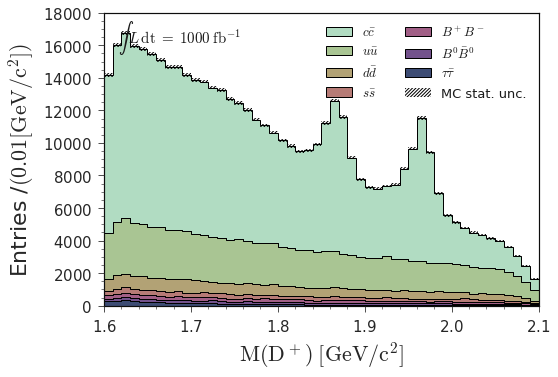

In [23]:

var = 'Dp_M'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (1.6,2.1)
nbins = 50
xlabel = "$\mathrm{M(D^+)}$"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_DpM.png"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_tight_selv0_DpM.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c^2]",luminosity=luminosity)
plt.tight_layout()

plt.savefig(img_path)


[3387339. 3082488. 2808150. 2562600. 2334765. 2135533. 1946025. 1777667.
 1623470. 1484306. 1356560. 1235741. 1129268. 1031918.  942292.  862773.
  787380.  720743.  659136.  600966.  549587.  499440.  455161.  414007.
  376203.  340821.  310505.  279175.  252058.  227863.  204372.  182501.
  163611.  147026.  130309.  116337.  102571.   90415.   79746.   70563.
   60884.   53267.   46689.   40349.   34712.   29442.   25874.   22216.
   19028.   16237.]
fitst_bin_entries=3387339.0


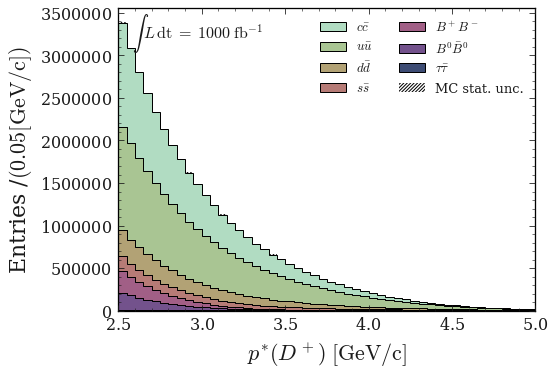

In [34]:
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

var = 'Dp_CMS_p'
xrange = (2.5,5)
nbins = 50
xlabel = "$p^{*}(D^+)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_DpCMSp.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="[GeV/c]",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)


In [39]:
# var = 'Dp_cosAngleBetweenMomentumAndVertexVector'
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

# xrange = (-1,1)
# nbins = 50
# xlabel = r"$D^{+}$ cosAngleBetweenMomentumAndVertexVector"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_Dp_cosAngleBetweenMomentumAndVertexVector.png"


# MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
# plt.tight_layout()

# plt.savefig(img_path)


[1.000000e+00 4.792200e+04 5.089770e+05 1.056383e+06 1.377894e+06
 1.564994e+06 1.683533e+06 1.758185e+06 1.793713e+06 1.809382e+06
 1.808042e+06 1.786767e+06 1.745085e+06 1.693771e+06 1.632289e+06
 1.561364e+06 1.484568e+06 1.405456e+06 1.318621e+06 1.236550e+06
 1.148952e+06 1.059392e+06 9.749580e+05 8.941410e+05 8.150450e+05
 7.406790e+05 6.689160e+05 6.025150e+05 5.351370e+05 4.732840e+05
 4.162190e+05 3.650060e+05 3.196140e+05 2.774860e+05 2.391630e+05
 2.043300e+05 1.736200e+05 1.460270e+05 1.231730e+05 1.039730e+05
 8.648900e+04 7.242700e+04 6.025100e+04 4.919200e+04 3.932100e+04
 3.107300e+04 2.296500e+04 1.582500e+04 9.268000e+03 2.981000e+03]
fitst_bin_entries=1.0


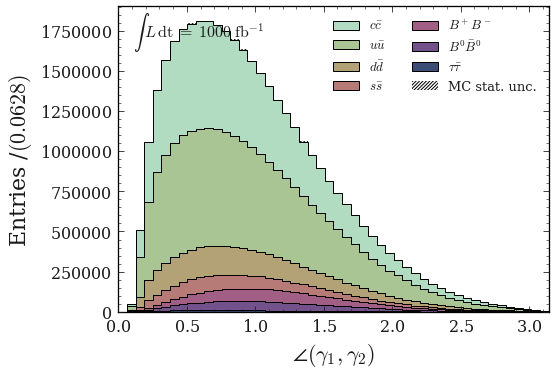

In [42]:
var = 'eta_Pi0_daughterAngle_0_1'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,math.pi)
nbins = 50
xlabel = r"$\angle (\gamma_1,\gamma_2)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_eta_Pi0_daughterAngle_0_1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[ 238882.  243500.  249820.  261554.  278647.  297713.  322964.  353088.
  389454.  431950.  484047.  542206.  608194.  680305.  766284.  859753.
  969756. 1095360. 1232176. 1367233. 1485418. 1583186. 1640032. 1561021.
 1331445. 1328344. 1507886. 1552747. 1497872. 1419007. 1306772. 1182584.
 1052856.  933004.  832587.  745995.  664652.  593747.  530335.  475515.
  427082.  384636.  349162.  319566.  295472.  274887.  261202.  249627.
  244851.  240543.]
fitst_bin_entries=238882.0


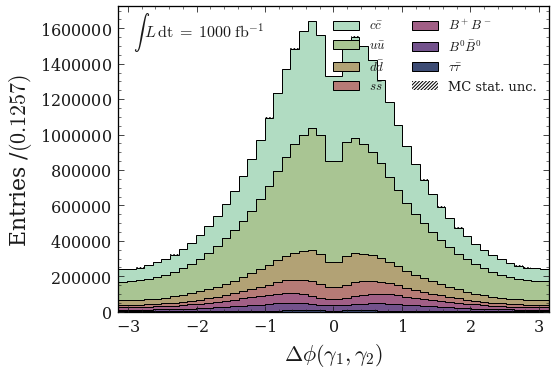

In [41]:
var = 'eta_Pi0_daughterDiffOfPhi_0_1'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-math.pi,math.pi)
nbins = 50
xlabel = r"$\Delta \phi(\gamma_1,\gamma_2)$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_eta_Pi0_daughterDiffOfPhi_0_1.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.tight_layout()

plt.savefig(img_path)

[       0.        0.        0.        0.        0.   341694.   332807.
   329075.   340097.   346788.   365727.   388191.   414187.   441755.
   464526.   486359.   524508.   554701.   574625.   618061.   587346.
   590743.   600300.   578588.   565838.   511730.   484074.   463048.
   443651.   425162.   410546.   393292.   366344.   340516.   323967.
   313281.   305459.   302655.   300689.   304074.   309525.   321201.
   338645.   365162.   410337.   478966.   594325.   812619.  2865993.
 16313742.]
fitst_bin_entries=0.0


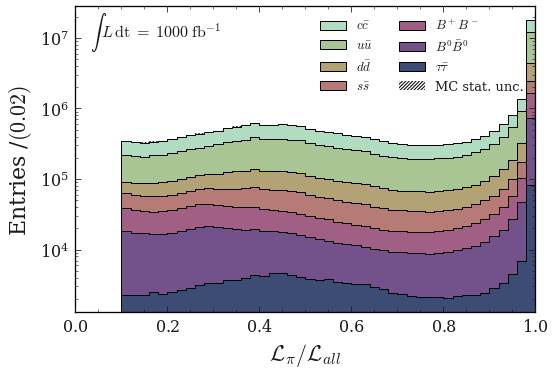

In [44]:
var = 'Pip_pionID'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = r"$\mathcal{L}_{\pi}/\mathcal{L}_{all}$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_pionID.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

In [46]:
# var = 'Pip_pionIDNN'
# data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

# xrange = (0,1)
# nbins = 50
# xlabel = r"DNN $\mathcal{L}_{\pi}/\mathcal{L}_{all}$"
# img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_pionIDNN.png"


# MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
# plt.yscale('log')

# plt.tight_layout()

# plt.savefig(img_path)

[3.3170749e+07 1.4950830e+06 5.2260600e+05 3.0636000e+05 2.2146800e+05
 1.7483900e+05 1.4464300e+05 1.2350200e+05 1.0834600e+05 9.6502000e+04
 8.7617000e+04 8.0214000e+04 7.4180000e+04 6.8805000e+04 6.5352000e+04
 6.1164000e+04 5.8204000e+04 5.4707000e+04 5.3085000e+04 4.9504000e+04
 4.7946000e+04 4.6374000e+04 4.3897000e+04 4.2439000e+04 4.0994000e+04
 3.9115000e+04 3.7846000e+04 3.6357000e+04 3.5340000e+04 3.3807000e+04
 3.3484000e+04 3.1594000e+04 3.1192000e+04 3.0735000e+04 2.8993000e+04
 2.8455000e+04 2.8295000e+04 2.7082000e+04 2.6182000e+04 2.5737000e+04
 2.5317000e+04 2.4098000e+04 2.4301000e+04 2.3864000e+04 2.3137000e+04
 2.3094000e+04 2.2640000e+04 2.2556000e+04 2.2013000e+04 2.1105000e+04]
fitst_bin_entries=33170749.0


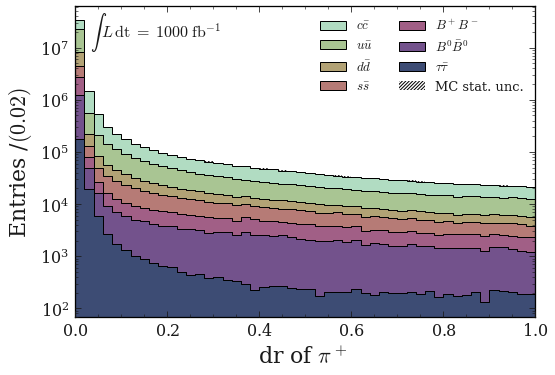

In [51]:
var = 'Pip_dr'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (0,1)
nbins = 50
xlabel = r"dr of $\pi^+$ "
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_dr.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

In [49]:
var = 'Pip_dz'
data  = [pd_taupair[var], pd_mixed[var], pd_charged[var],pd_ssbar[var], pd_ddbar[var],pd_uubar[var], pd_ccbar[var]]  

xrange = (-3,3)
nbins = 50
xlabel = r"dz of $\pi^+$"
img_path = plot_directory + "/MC15ri_Dpetapip_pipi_pre_sel_etapip_Pip_dz.png"


MC_stack_plot(data, var, scale, xrange, nbins, xlabel=xlabel, labels=labels,title="", unit="",luminosity=luminosity,force_range=xrange)
plt.yscale('log')

plt.tight_layout()

plt.savefig(img_path)

KeyError: 'Pip_dz'

In [38]:
pd_ccbar

,__experiment__,__run__,__event__,Dp_M,Dp_isSignal,Dp_CMS_p,etapip_Eta_M,etapip_Eta_isSignal,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1,...,eta_Pi0_daughterDiffOfPhi_0_1,eta_Pip_pionID,eta_Pim_pionID,eta_Pip_pionIDNN,eta_Pim_pionIDNN,eta_Pip_mcPDG,eta_Pim_mcPDG,Pip_pionID,Pip_mcPDG,Pip_dr
0,1003,0,39597571,1.739505,NaN,2.500390,0.539355,NaN,-0.334168,0.387020,...,-1.036867,1.000000,0.372755,1.000000,0.999937,211.0,-211.0,0.999838,-211.0,0.002138
1,1003,0,39597843,1.605385,0.0,2.840073,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.835206,-211.0,0.981222
2,1003,0,39597843,1.665297,0.0,2.900674,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.660983,-211.0,0.168197
3,1003,0,39597843,1.948129,0.0,2.881411,0.517964,0.0,0.088200,0.088210,...,1.180757,0.999997,0.999958,0.953778,0.990642,211.0,-211.0,0.988273,-211.0,0.148974
4,1003,0,39598195,2.082142,0.0,2.531889,0.548404,0.0,-0.994237,0.712364,...,-0.623936,0.990679,0.917305,0.999268,1.000000,211.0,-211.0,0.223845,-211.0,0.002318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004116,1003,0,172499417,1.736102,NaN,2.911517,0.546531,NaN,-0.585402,0.492618,...,1.683241,0.114848,0.452891,0.996791,1.000000,211.0,-211.0,0.213016,-321.0,0.003416
13004117,1003,0,172499659,1.816576,NaN,2.537393,0.562960,NaN,-0.005052,0.200479,...,-1.532427,0.906163,0.477166,0.999836,0.487852,211.0,-321.0,0.753038,211.0,0.338211
13004118,1003,0,172499659,1.821560,NaN,2.560320,0.559221,NaN,-0.005052,0.200479,...,-1.295670,0.906163,0.477166,0.999836,0.487852,211.0,-321.0,0.753038,211.0,0.338211
13004119,1003,0,172499770,1.983822,0.0,2.599950,0.540366,0.0,0.216980,0.300520,...,-0.260272,1.000000,0.999998,0.999772,1.000000,211.0,-211.0,0.989505,211.0,0.004771
